In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# %cd /content/gdrive/MyDrive/Thesis_simulation/Average_case/Small_alpha

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Thesis_simulation/Average_case/Small_alpha


In [4]:
rounds = 100
vehicle_limit = 80
all_routes = [[0, 3], [0, 1], [2, 3], [2, 1]]

In [5]:
record = pd.read_csv(f'Saved_data/Simulation_records/Round_{rounds}.csv')
utility = pd.read_csv(f'Saved_data/Utility_data/Round_{rounds}.csv')

In [6]:
record

,Vehicle_label,Road_order,Total_time,Leading_vehicles,Stopped_time,Stop_while_front,Round_number
0,0,"[0, 1]",72.00,"[-999, 14]","[0, 0]","[2.499999999999999, 0]",1
1,1,"[0, 1]",73.35,"[0, 0]","[0, 0]","[0, 0]",1
2,2,"[0, 3]",110.05,"[1, 19]","[3.099999999999997, 0]","[3.099999999999997, 0]",1
3,3,"[0, 1]",84.55,"[2, 21]","[2.8999999999999977, 0]","[2.8999999999999977, 0]",1
4,4,"[2, 1]",36.40,"[-999, -999]","[0, 0]","[0, 0]",1
...,...,...,...,...,...,...,...
7995,75,"[0, 1]",135.60,"[74, 74]","[0.8000000000000002, 0]","[0, 0]",100
7996,76,"[0, 1]",131.65,"[75, 75]","[0, 0]","[0, 0]",100
7997,77,"[0, 3]",161.35,"[76, 72]","[0, 0]","[0, 0]",100
7998,78,"[0, 1]",133.80,"[77, 76]","[0, 0]","[0, 0]",100


In [7]:
record['Road_order'] = record.apply(lambda row: ast.literal_eval(row['Road_order']), axis=1)
record["Road_order_label"] = record.apply(lambda row: all_routes.index(row.Road_order), axis=1)

utility['Routes_taken'] = utility.apply(lambda row: ast.literal_eval(row['Routes_taken']), axis=1)

In [9]:
time_df = pd.pivot_table(record, values='Total_time', 
                         index=['Road_order_label', 'Round_number'], 
                         aggfunc=np.mean).reset_index(drop=False)

array([107.76607143, 116.15238095, 117.585     ,  98.67272727,
       118.10833333, 118.02      , 120.75882353, 114.87820513,
       115.0530303 , 116.56833333, 127.99444444, 112.56764706,
       119.75147059, 110.38225806, 119.74615385, 119.73382353,
       112.06458333, 112.035     , 108.94038462, 116.32      ,
       114.97916667, 119.90694444, 110.95909091, 120.54285714,
       118.10571429, 114.68142857, 117.98793103, 114.2375    ,
       116.28484848, 116.22407407, 115.21111111, 117.20806452,
       130.55178571, 120.73125   , 116.54166667, 119.4421875 ,
       115.77941176, 117.75512821, 107.45185185, 121.9       ,
       114.23548387, 114.5030303 , 120.67857143, 121.54583333,
       117.78421053, 112.72297297, 116.4578125 , 116.59038462,
       113.76458333, 110.84358974, 113.65571429, 119.92741935,
       111.35416667, 125.63      , 125.34      , 117.54      ,
       116.87857143, 118.19354839, 120.66923077, 122.53636364,
       118.78214286, 116.3030303 , 116.555     , 118.33

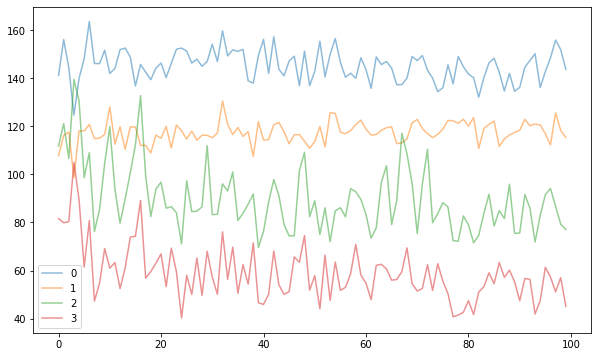

In [10]:
# Changes in average time needed to go through each route over time
plot_route_time = [[], [], [], []]

for i in range(4):
    times = time_df.loc[time_df.Road_order_label==i].sort_values('Round_number').Total_time.values
    plot_route_time[i]=times
        
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.plot(plot_route_time[i], label=str(i), alpha=0.5)
    
plt.legend()

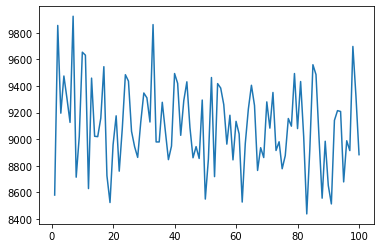

In [11]:
time_df2 = pd.pivot_table(record, values='Total_time', index='Round_number', aggfunc=np.sum).reset_index(drop=False)
plt.plot(time_df2.Round_number, time_df2.Total_time)

In [12]:
time_df2.Total_time[-20:].mean()

9030.937499999844

In [13]:
utility

,Vehicle_label,Utilities,Probabilities,Routes_taken,Gamma,Eta
0,0,"[-4.504690158432542, -3.636821506036993, -2.53...","[0.05412542077399156, 0.12891749328533442, 0.3...","[1, 2, 0, 3, 1, 2, 0, 3, 1, 3, 2, 2, 1, 1, 2, ...",4.748006,0.661083
1,1,"[-8.36651161540856, -7.564735997105977, -6.384...","[0.039501173252868074, 0.08806771369332388, 0....","[1, 3, 2, 0, 3, 2, 0, 2, 2, 3, 3, 3, 0, 3, 3, ...",5.137555,1.028395
2,2,"[-9.602978525300223, -8.728037074948155, -7.56...","[0.032064873761346084, 0.07691512998464828, 0....","[0, 1, 2, 3, 2, 3, 1, 2, 2, 1, 3, 3, 2, 3, 3, ...",4.928348,1.084924
3,3,"[-4.981672157918456, -4.8518935502040605, -3.9...","[0.11317375901065059, 0.12885695791427526, 0.3...","[1, 0, 2, 3, 1, 2, 1, 2, 1, 1, 3, 1, 2, 2, 3, ...",5.073592,0.850096
4,4,"[-4.976613502314984, -5.0218236095577415, -3.8...","[0.11437042042963409, 0.10931486366930086, 0.3...","[3, 0, 2, 1, 2, 1, 3, 2, 1, 1, 0, 3, 0, 3, 3, ...",4.239099,0.856020
...,...,...,...,...,...,...
75,75,"[-25.858538120865497, -23.07239634976971, -23....","[0.037670024983250415, 0.6109447050722935, 0.3...","[2, 1, 0, 3, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...",5.190694,1.325307
76,76,"[-9.277058914075846, -8.886522405324182, -11.6...","[0.34531259135349984, 0.5102937689591655, 0.03...","[1, 0, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...",4.516151,1.094225
77,77,"[-3.246927411670529, -2.647922742178402, -6.32...","[0.3360056878874447, 0.6116332006857934, 0.015...","[2, 0, 1, 3, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, ...",5.172146,0.739114
78,78,"[-2.9628424903560644, -2.9174584507640438, -6....","[0.4746326336207963, 0.496669662182309, 0.0202...","[0, 1, 3, 2, 3, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, ...",5.425521,0.821906


In [14]:
# utility['Probabilities'] = utility.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
# prob_df = pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))
# print(prob_df.shape)
# display(prob_df.head(10))

In [15]:
route_df = pd.DataFrame(utility['Routes_taken'].to_list(), columns=range(rounds))
print(route_df.shape)
display(route_df.head(10))

(80, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1,2,0,3,1,2,0,3,1,3,...,2,2,3,3,3,3,3,3,2,2
1,1,3,2,0,3,2,0,2,2,3,...,0,3,3,3,0,3,3,3,3,3
2,0,1,2,3,2,3,1,2,2,1,...,2,3,2,2,3,3,3,3,2,3
3,1,0,2,3,1,2,1,2,1,1,...,3,3,3,3,3,2,1,3,3,3
4,3,0,2,1,2,1,3,2,1,1,...,2,3,1,1,3,2,3,0,3,3
5,2,1,0,3,3,3,2,3,1,3,...,3,3,3,3,3,3,3,3,3,3
6,1,3,0,2,3,1,3,2,0,1,...,0,2,3,2,2,0,1,2,1,2
7,2,3,1,0,3,3,3,3,1,0,...,3,3,3,1,3,3,3,3,3,3
8,1,2,3,0,1,2,3,1,2,2,...,3,1,3,2,2,3,2,2,2,0
9,0,3,1,2,3,1,1,3,0,3,...,2,3,3,1,2,2,3,2,2,3


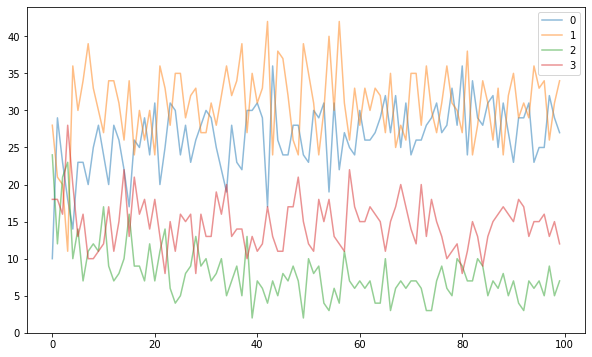

In [16]:
# Changes in number of vehicles that took the route over time
plot_route_l = [[], [], [], []]

for i in range(4):
    for j in range(rounds):
        plot_route_l[i].append(len(route_df.loc[route_df[j]==i]))
        
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.plot(plot_route_l[i], label=str(i), alpha=0.5)
    
plt.legend()

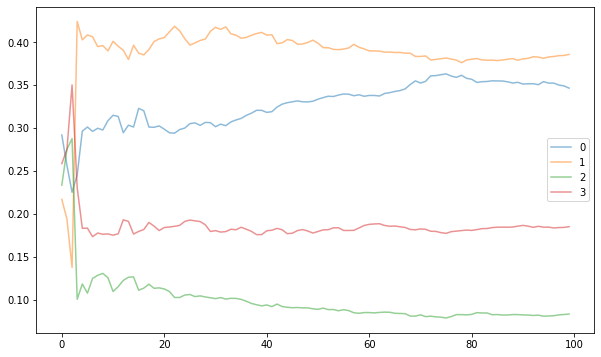

In [17]:
# Changes in vehicles' probabilities of selecting each route over time
plot_prob_l = [[], [], [], []]

for r in range(1, rounds+1):
    df = pd.read_csv(f'Saved_data/Utility_data/Round_{r}.csv')
    df['Probabilities'] = df.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
    for i in range(4):
        avg_prob = pd.DataFrame(df['Probabilities'].to_list(), columns=range(4))[i].mean()
        plot_prob_l[i].append(avg_prob)
        
        
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.plot(plot_prob_l[i], label=str(i), alpha=0.5)
    
plt.legend()

In [18]:
utility

,Vehicle_label,Utilities,Probabilities,Routes_taken,Gamma,Eta
0,0,"[-4.504690158432542, -3.636821506036993, -2.53...","[0.05412542077399156, 0.12891749328533442, 0.3...","[1, 2, 0, 3, 1, 2, 0, 3, 1, 3, 2, 2, 1, 1, 2, ...",4.748006,0.661083
1,1,"[-8.36651161540856, -7.564735997105977, -6.384...","[0.039501173252868074, 0.08806771369332388, 0....","[1, 3, 2, 0, 3, 2, 0, 2, 2, 3, 3, 3, 0, 3, 3, ...",5.137555,1.028395
2,2,"[-9.602978525300223, -8.728037074948155, -7.56...","[0.032064873761346084, 0.07691512998464828, 0....","[0, 1, 2, 3, 2, 3, 1, 2, 2, 1, 3, 3, 2, 3, 3, ...",4.928348,1.084924
3,3,"[-4.981672157918456, -4.8518935502040605, -3.9...","[0.11317375901065059, 0.12885695791427526, 0.3...","[1, 0, 2, 3, 1, 2, 1, 2, 1, 1, 3, 1, 2, 2, 3, ...",5.073592,0.850096
4,4,"[-4.976613502314984, -5.0218236095577415, -3.8...","[0.11437042042963409, 0.10931486366930086, 0.3...","[3, 0, 2, 1, 2, 1, 3, 2, 1, 1, 0, 3, 0, 3, 3, ...",4.239099,0.856020
...,...,...,...,...,...,...
75,75,"[-25.858538120865497, -23.07239634976971, -23....","[0.037670024983250415, 0.6109447050722935, 0.3...","[2, 1, 0, 3, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...",5.190694,1.325307
76,76,"[-9.277058914075846, -8.886522405324182, -11.6...","[0.34531259135349984, 0.5102937689591655, 0.03...","[1, 0, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...",4.516151,1.094225
77,77,"[-3.246927411670529, -2.647922742178402, -6.32...","[0.3360056878874447, 0.6116332006857934, 0.015...","[2, 0, 1, 3, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, ...",5.172146,0.739114
78,78,"[-2.9628424903560644, -2.9174584507640438, -6....","[0.4746326336207963, 0.496669662182309, 0.0202...","[0, 1, 3, 2, 3, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, ...",5.425521,0.821906


In [19]:
# utility['Probabilities'] = utility.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
# pd.DataFrame(df['Probabilities'].to_list(), columns=range(4))[i].mean()

In [20]:
plot_eta_prob = [[], [], [], []]

utility['Probabilities'] = utility.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
# pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))[i].values

for i in range(4):
    plot_eta_prob[i]=pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))[i].values

In [21]:
# pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))[i].values

In [22]:
# len(utility.Eta.values), len(plot_eta_prob[1])

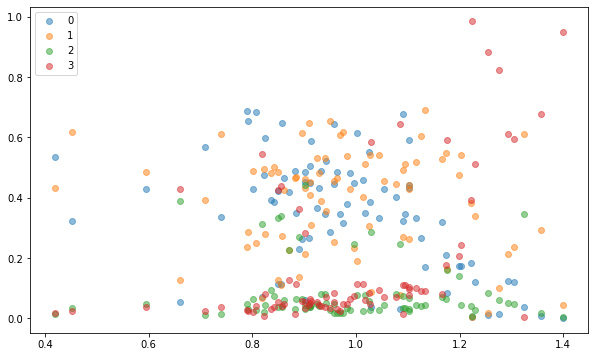

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.scatter(utility.Eta.values, plot_eta_prob[i], label=str(i), alpha=0.5)
    
plt.legend()

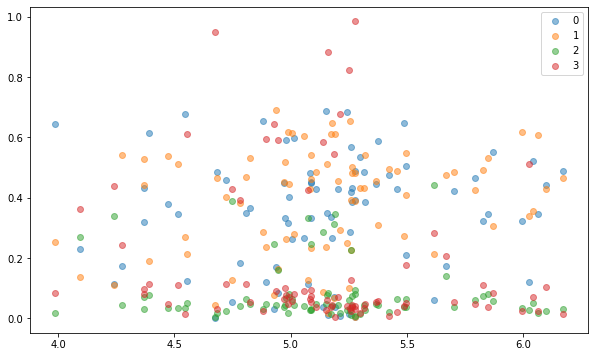

In [24]:
plot_gamma_prob = plot_eta_prob

fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.scatter(utility.Gamma.values, plot_gamma_prob[i], label=str(i), alpha=0.5)
    
plt.legend()

In [25]:
summary = pd.read_csv('Saved_data/Simulation_records/Summary.csv')

In [26]:
summary.head(20)

,Vehicle_label,Road_order,Caused_delay,Count,Total_time
0,0,0,2.727778,9,99.805556
1,0,1,1.195455,22,71.940909
2,0,2,0.000000,34,67.750000
3,0,3,0.000000,35,36.400000
4,1,0,1.754545,11,105.059091
5,1,1,1.175000,8,75.012500
6,1,2,0.000000,27,68.748148
7,1,3,0.000000,54,37.370370
8,2,0,1.520000,5,106.500000
9,2,1,1.175000,6,73.675000
